In [ ]:
!pip install python-louvain

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx.algorithms import cuts
from networkx.algorithms import community

In [ ]:
#Load karate graph
G = nx.karate_club_graph()

In [ ]:
#Girvan-Newman
girvan_newman_generator = community.girvan_newman(G)
#best_modularity = -1
#best_partition = None
#while True:
# try:
#   current_partition = next(girvan_newman_generator)
#   current_modularity community.modularity(G, current_partition)
#   if current_modularity > best_modularity:
#     best_modularity = current_modularity
#     best_partition = current_partition
# except StopIteration:
    #break
#girvan_newman_partition = best_partition
girvan_newman_partition = max(girvan_newman_generator, key=lambda partition: community.modularity (G, partition))

In [ ]:
# Label Propagation
label_propagation_partition = community.label_propagation_communities(G)

In [ ]:
# Detect communities using different methods
# Louvain (using alternative)
louvain_partition = list(community.louvain_communities(G))

In [ ]:
# Add function to calculate metrics
def calculate_metrics(G, communities):
    metrics = {
        'num_communities': len(communities),
        'modularity': community.modularity(G, communities),
        'conductance': np.mean([cuts.conductance(G, c) for c in communities]),
        'normalized_cut': np.mean([cuts.normalized_cut_size(G, c) for c in communities])
    }
    return metrics

In [ ]:
def create_community_node_colors(graph, communities):
    node_colors = []
    for node in graph:
        for idx, comm in enumerate(communities):
            if node in comm:
                node_colors.append(plt.cm.jet(idx / len(communities)))
                break
    return node_colors

def visualize_communities(graph, communities, title, ax):
    node_colors = create_community_node_colors(graph, communities)
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    modularity = community.modularity(graph, communities)

    ax.set_title(f"{title}\n{len(communities)} communities (Modularity: {modularity:.3f})")
    nx.draw(graph, pos=pos, node_size=500, node_color=node_colors,
            with_labels=True, font_size=10, ax=ax)

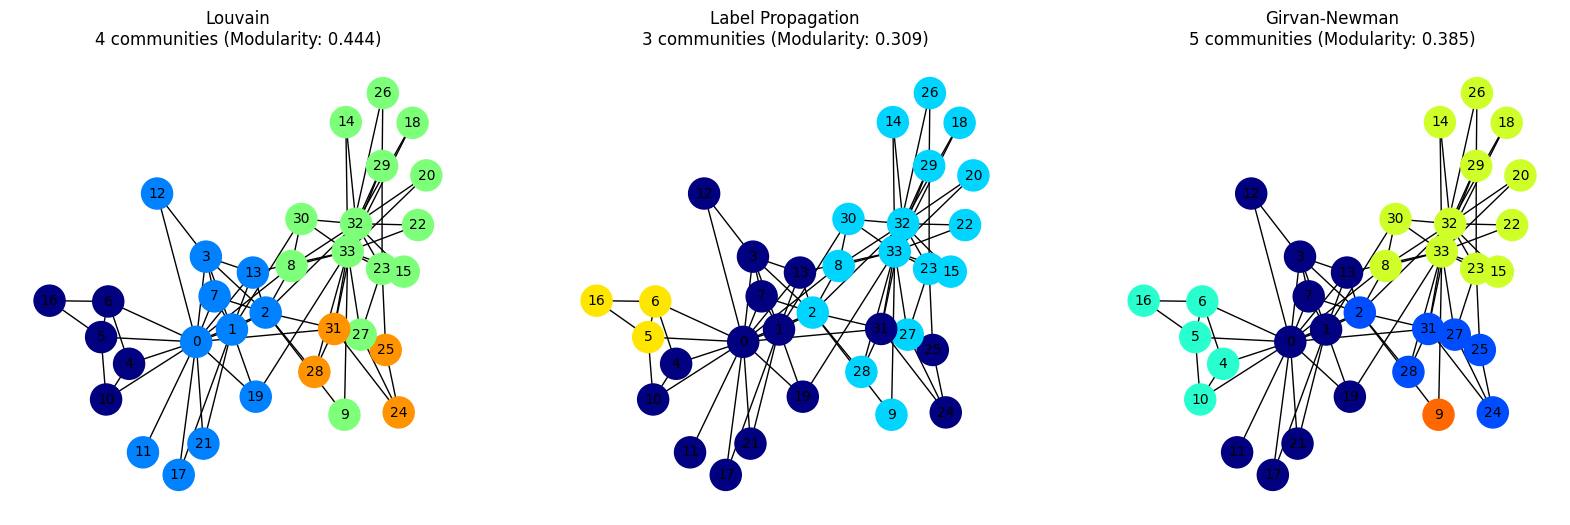

In [ ]:
# Plot communities
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

visualize_communities(G, louvain_partition, "Louvain", axes[0])
visualize_communities(G, label_propagation_partition, "Label Propagation", axes[1])
visualize_communities(G, girvan_newman_partition, "Girvan-Newman", axes[2])

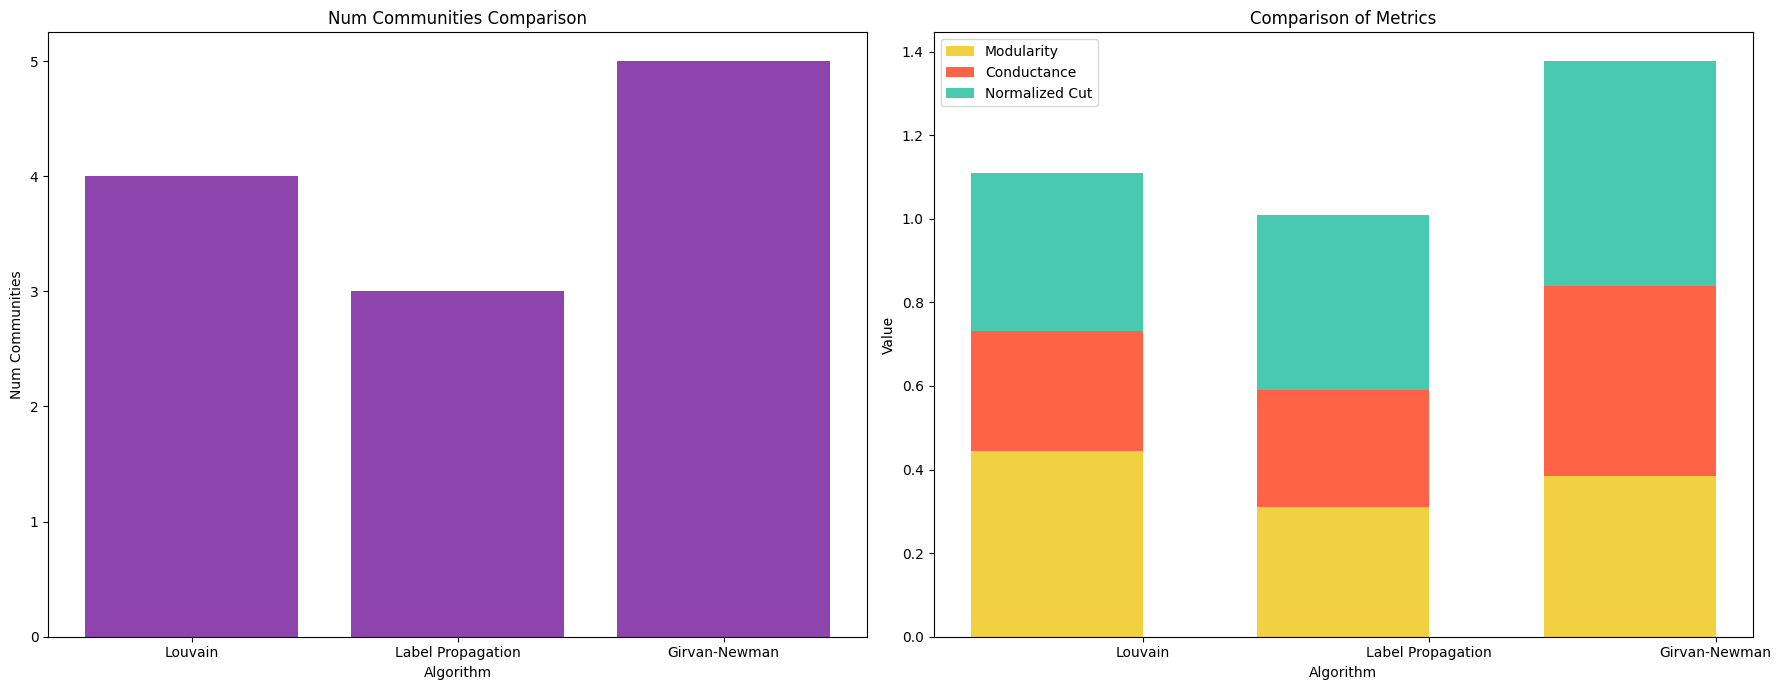

In [ ]:
# Create DataFrame for metrics comparison
metrics_data = []
algorithms = ["Louvain", "Label Propagation", "Girvan-Newman"]

for partition, algorithm in zip([louvain_partition, label_propagation_partition, girvan_newman_partition], algorithms):
    metrics = calculate_metrics(G, partition)
    metrics_data.append({
        'Algorithm': algorithm,
        'Num Communities': metrics['num_communities'],
        'Modularity': metrics['modularity'],
        'Conductance': metrics['conductance'],
        'Normalized Cut': metrics['normalized_cut']
    })

metrics_df = pd.DataFrame(metrics_data)

# Plot the comparison of metrics
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Bar chart for comparing 'Num Communities' between algorithms
axes[0].bar(metrics_df['Algorithm'], metrics_df['Num Communities'], color="#8E44AD")
axes[0].set_title("Num Communities Comparison")
axes[0].set_xlabel("Algorithm")
axes[0].set_ylabel("Num Communities")

# Bar chart for comparing Modularity, Conductance, and Normalized Cut for each algorithm
bar_width = 0.6  # Increase the width of the bars
x = np.arange(len(metrics_df['Algorithm']))  # X positions for each algorithm

axes[1].bar(x - bar_width/2, metrics_df['Modularity'], width=bar_width, label='Modularity', color="#F2D140")
axes[1].bar(x - bar_width/2, metrics_df['Conductance'], width=bar_width, label='Conductance', color="#FF6347", bottom=metrics_df['Modularity'])
axes[1].bar(x - bar_width/2, metrics_df['Normalized Cut'], width=bar_width, label='Normalized Cut', color="#48C9B0", bottom=metrics_df['Modularity'] + metrics_df['Conductance'])

axes[1].set_title("Comparison of Metrics")
axes[1].set_xlabel("Algorithm")
axes[1].set_ylabel("Value")
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics_df['Algorithm'])
axes[1].legend()

plt.tight_layout()
plt.show()

## VIẾT TIẾP TRONG Lab03.02
1. Viết lại bài Lab03.02 thành class, xây dựng pipeline áp dụng cho đồ thị mạng xã hội bất kỳ.

## TẠO MỚI Lab03.03
2. Giới thiệu tổng quan về thuật toán louvain
3. Tóm tắt tổng quan các chỉ số đánh giá việc phát hiện cộng đồng (công thức, phạm vi, như thế nào là tốt, ....  )
4. Thực hiện phân tích việc (nhận xét)
phát hiện cộng đồng cho mạng xã hội tự chọn

Phát hiện cộng đồng bằng Louvain...
Phát hiện cộng đồng bằng Girvan-Newman...
Phát hiện cộng đồng bằng Label Propagation...
Trực quan hóa các cộng đồng...
So sánh các chỉ số giữa các thuật toán...


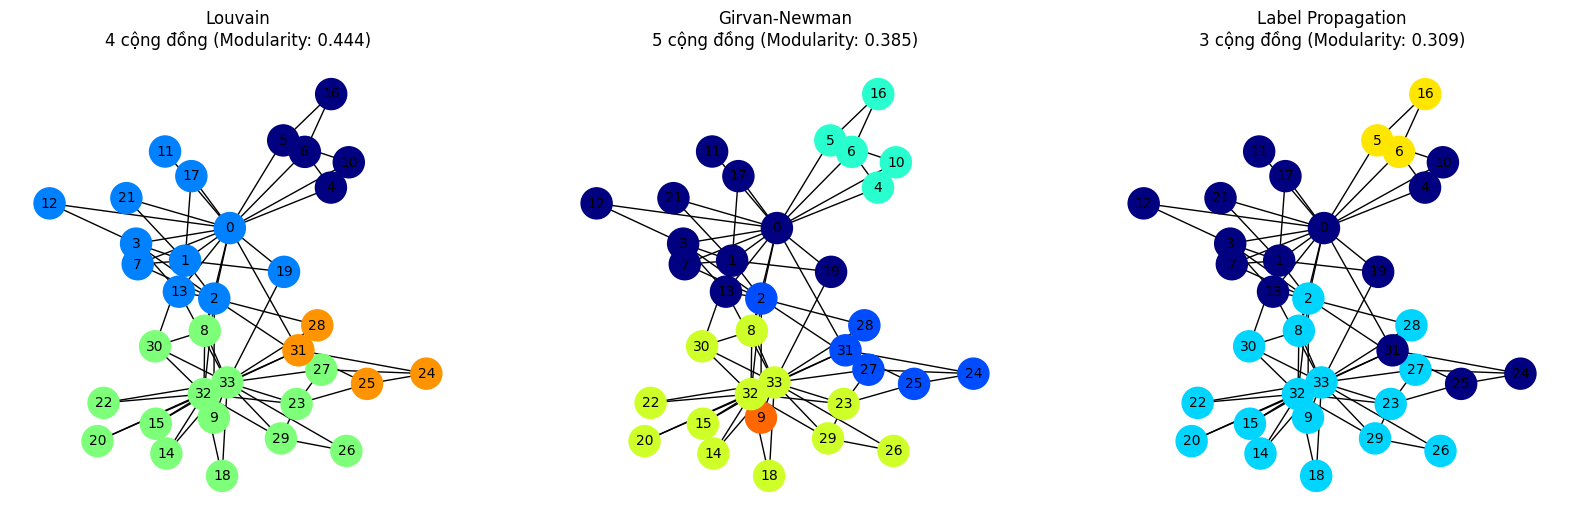

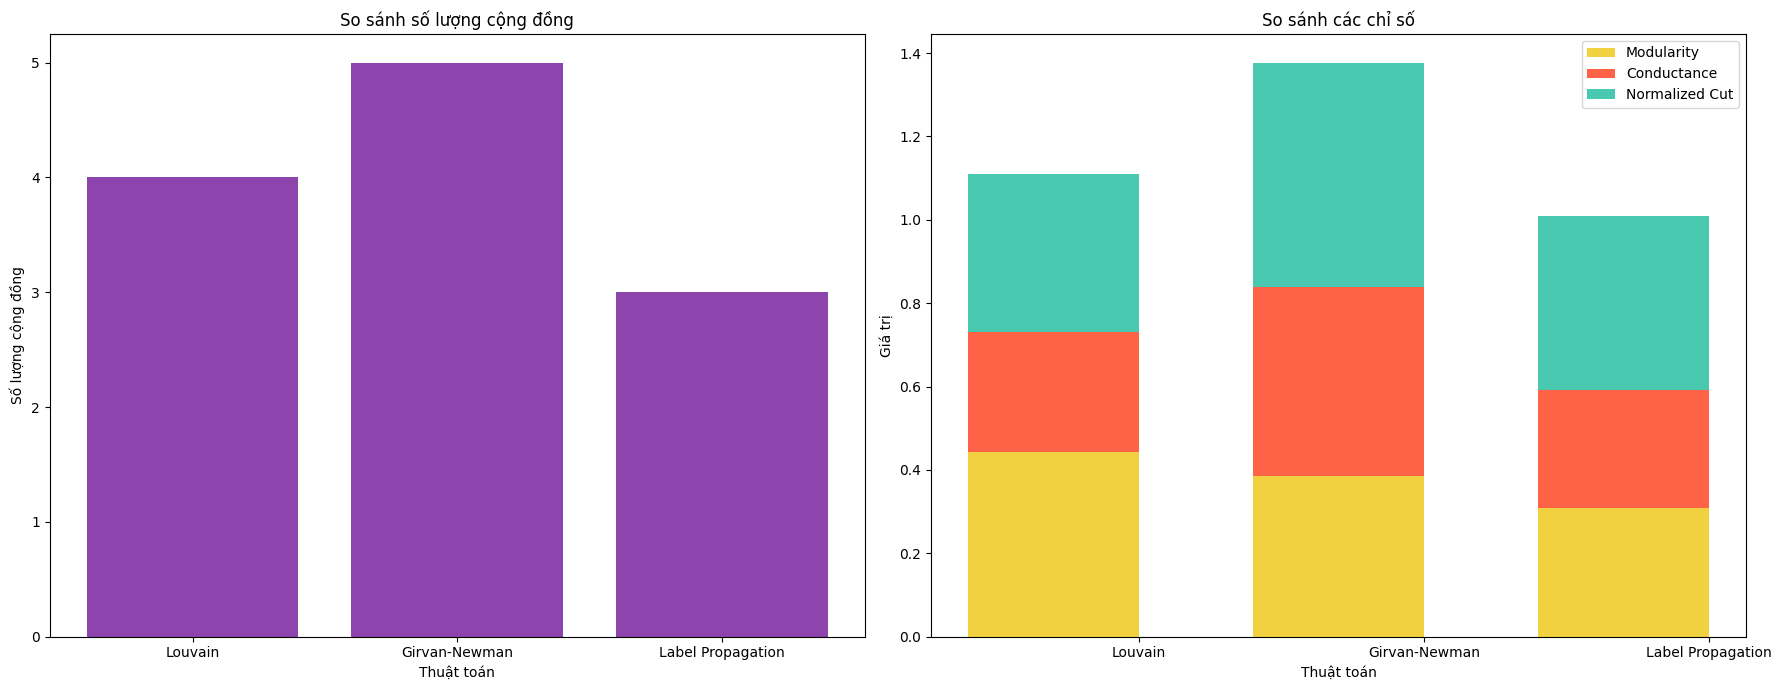

           Algorithm  Num Communities  Modularity  Conductance  Normalized Cut
0            Louvain                4    0.443854     0.287500        0.379227
1      Girvan-Newman                5    0.384972     0.453516        0.538669
2  Label Propagation                3    0.309486     0.281398        0.418541


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms import community

class CommunityAnalysis:
    def __init__(self, graph):
        self.graph = graph
        self.partitions = {}

    def detect_communities_louvain(self):
        """Phát hiện cộng đồng bằng phương pháp Louvain."""
        self.partitions['Louvain'] = list(community.louvain_communities(self.graph))
        return self.partitions['Louvain']

    def detect_communities_girvan_newman(self):
        """Phát hiện cộng đồng bằng phương pháp Girvan-Newman."""
        girvan_newman_generator = community.girvan_newman(self.graph)
        self.partitions['Girvan-Newman'] = max(
            girvan_newman_generator, key=lambda partition: community.modularity(self.graph, partition)
        )
        return self.partitions['Girvan-Newman']

    def detect_communities_label_propagation(self):
        """Phát hiện cộng đồng bằng phương pháp Label Propagation."""
        self.partitions['Label Propagation'] = list(community.label_propagation_communities(self.graph))
        return self.partitions['Label Propagation']

    def calculate_metrics(self, communities):
        """Tính toán các chỉ số đánh giá."""
        num_communities = len(communities)
        modularity = community.modularity(self.graph, communities)

        def conductance(graph, community):
            """Tính độ dẫn (conductance) cho một cộng đồng."""
            cut_edges = nx.cut_size(graph, community)  # Số cạnh cắt
            volume = sum(dict(nx.degree(graph, community)).values())  # Tổng số bậc của cộng đồng
            total_volume = sum(dict(nx.degree(graph)).values())  # Tổng số bậc của toàn đồ thị
            outside_volume = total_volume - volume  # Bậc của các nút bên ngoài
            return cut_edges / min(volume, outside_volume) if volume > 0 and outside_volume > 0 else 0

        def normalized_cut(graph, community):
            """Tính độ cắt chuẩn hóa (normalized cut) cho một cộng đồng."""
            cut_edges = nx.cut_size(graph, community)  # Số cạnh cắt
            volume = sum(dict(nx.degree(graph, community)).values())  # Tổng số bậc của cộng đồng
            total_volume = sum(dict(nx.degree(graph)).values())  # Tổng số bậc của toàn đồ thị
            outside_volume = total_volume - volume  # Bậc của các nút bên ngoài
            if volume > 0 and outside_volume > 0:
                return cut_edges / volume + cut_edges / outside_volume
            return 0

        conductances = [conductance(self.graph, c) for c in communities]
        normalized_cuts = [normalized_cut(self.graph, c) for c in communities]

        return {
            'num_communities': num_communities,
            'modularity': modularity,
            'conductance': np.mean(conductances),
            'normalized_cut': np.mean(normalized_cuts)
        }

    def visualize_communities(self, communities, title, ax=None):
        """Trực quan hóa cộng đồng."""
        if not communities:
            raise ValueError("Không có cộng đồng nào để trực quan hóa.")

        node_colors = []
        for node in self.graph:
            for idx, comm in enumerate(communities):
                if node in comm:
                    node_colors.append(plt.cm.jet(idx / len(communities)))
                    break

        pos = nx.spring_layout(self.graph, k=0.3, iterations=50, seed=42)
        modularity = community.modularity(self.graph, communities)

        if ax is None:
            _, ax = plt.subplots(figsize=(10, 6))

        ax.set_title(f"{title}\n{len(communities)} cộng đồng (Modularity: {modularity:.3f})")
        nx.draw(self.graph, pos=pos, node_size=500, node_color=node_colors, with_labels=True, font_size=10, ax=ax)

    def compare_metrics(self):
        """So sánh các chỉ số giữa các thuật toán."""
        metrics_data = []
        for method, communities in self.partitions.items():
            metrics = self.calculate_metrics(communities)
            metrics_data.append({
                'Algorithm': method,
                'Num Communities': metrics['num_communities'],
                'Modularity': metrics['modularity'],
                'Conductance': metrics['conductance'],
                'Normalized Cut': metrics['normalized_cut']
            })

        metrics_df = pd.DataFrame(metrics_data)

        # Vẽ biểu đồ so sánh
        fig, axes = plt.subplots(1, 2, figsize=(18, 7))

        axes[0].bar(metrics_df['Algorithm'], metrics_df['Num Communities'], color="#8E44AD")
        axes[0].set_title("So sánh số lượng cộng đồng")
        axes[0].set_xlabel("Thuật toán")
        axes[0].set_ylabel("Số lượng cộng đồng")

        bar_width = 0.6
        x = np.arange(len(metrics_df['Algorithm']))

        axes[1].bar(x - bar_width / 2, metrics_df['Modularity'], width=bar_width, label='Modularity', color="#F2D140")
        axes[1].bar(x - bar_width / 2, metrics_df['Conductance'], width=bar_width, label='Conductance', color="#FF6347",
                    bottom=metrics_df['Modularity'])
        axes[1].bar(x - bar_width / 2, metrics_df['Normalized Cut'], width=bar_width, label='Normalized Cut', color="#48C9B0",
                    bottom=metrics_df['Modularity'] + metrics_df['Conductance'])

        axes[1].set_title("So sánh các chỉ số")
        axes[1].set_xlabel("Thuật toán")
        axes[1].set_ylabel("Giá trị")
        axes[1].set_xticks(x)
        axes[1].set_xticklabels(metrics_df['Algorithm'])
        axes[1].legend()

        plt.tight_layout()
        plt.show()

        return metrics_df

    def main(self):
        """Thực thi toàn bộ pipeline."""
        print("Phát hiện cộng đồng bằng Louvain...")
        louvain_communities = self.detect_communities_louvain()

        print("Phát hiện cộng đồng bằng Girvan-Newman...")
        girvan_newman_communities = self.detect_communities_girvan_newman()

        print("Phát hiện cộng đồng bằng Label Propagation...")
        label_propagation_communities = self.detect_communities_label_propagation()

        print("Trực quan hóa các cộng đồng...")
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        self.visualize_communities(louvain_communities, "Louvain", ax=axes[0])
        self.visualize_communities(girvan_newman_communities, "Girvan-Newman", ax=axes[1])
        self.visualize_communities(label_propagation_communities, "Label Propagation", ax=axes[2])

        print("So sánh các chỉ số giữa các thuật toán...")
        metrics_df = self.compare_metrics()
        print(metrics_df)

# Ví dụ sử dụng
if __name__ == "__main__":
    G = nx.karate_club_graph()  # Tạo đồ thị mẫu
    analyzer = CommunityAnalysis(G)
    analyzer.main()
